#### [Data set here :](https://drive.google.com/file/d/1l-IFr-RPipnuxS4rAhrM9VX59H9dT8Dc/view?usp=sharing)    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Uber Request Data.csv')
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [4]:
df.isnull().sum()/len(df)

Request id           0.000000
Pickup point         0.000000
Driver id            0.392884
Status               0.000000
Request timestamp    0.000000
Drop timestamp       0.580282
dtype: float64

In [5]:
df.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [6]:
df['Driver id'].fillna(-1, inplace = True)

In [7]:
df.drop(columns = ['Drop timestamp'], inplace = True)

In [8]:
df.isnull().sum()/len(df)

Request id           0.0
Pickup point         0.0
Driver id            0.0
Status               0.0
Request timestamp    0.0
dtype: float64

In [9]:
def correct_date(x):
     return x.replace("-", "/")

df["Request timestamp"] = df["Request timestamp"].apply(correct_date)

df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], format = 'mixed')

In [10]:
df['Request timestamp'].dtype

dtype('<M8[ns]')

In [11]:
df['Request Day'] = df['Request timestamp'].dt.day_name()

In [12]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Request Day
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,Monday
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,Monday
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,Wednesday
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,Wednesday
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,Wednesday


In [13]:
import warnings
warnings.filterwarnings('ignore')

# Request statue distribution

In [14]:
status_distribution = df['Status'].value_counts()
status_distribution

Status
Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: count, dtype: int64

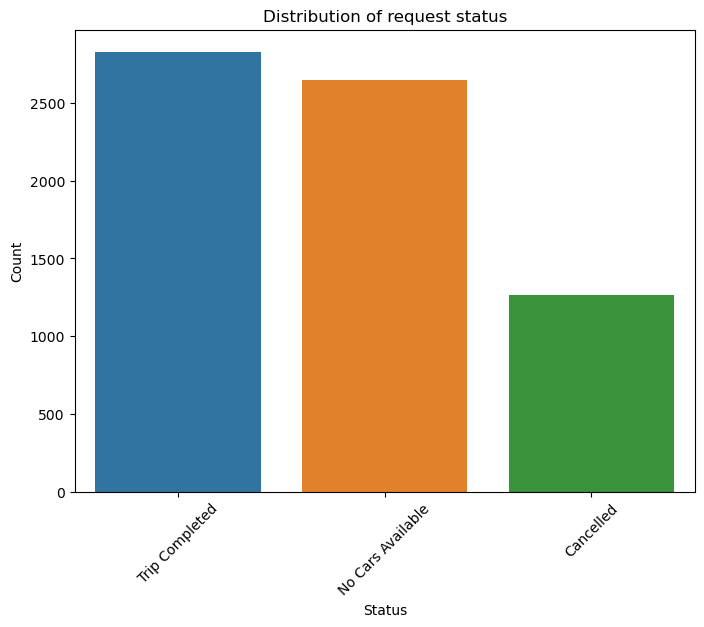

In [15]:
plt.figure(figsize = (8, 6))
sns.barplot(x = status_distribution.index, y = status_distribution.values)
plt.title('Distribution of request status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

# Pickup point analysis

In [16]:
pickup_point_analysis = df['Pickup point'].value_counts()
pickup_point_analysis

Pickup point
City       3507
Airport    3238
Name: count, dtype: int64

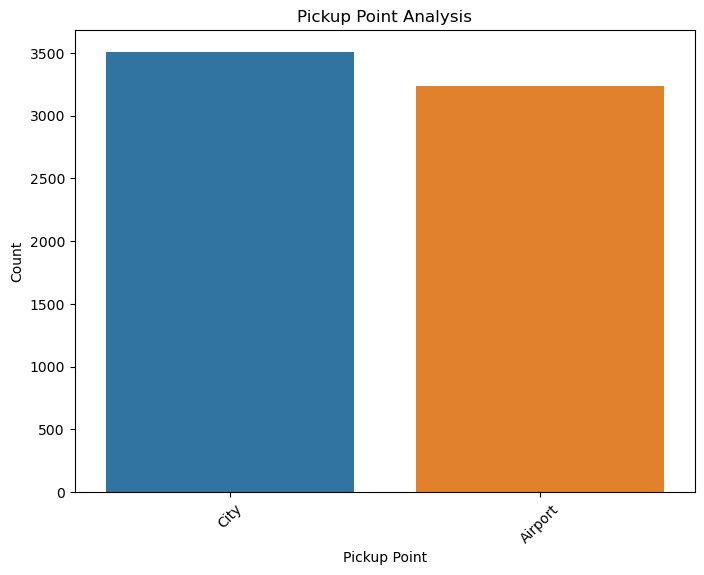

In [17]:
plt.figure(figsize = (8, 6))
sns.barplot(x = pickup_point_analysis.index, y = pickup_point_analysis.values)
plt.title('Pickup Point Analysis')
plt.xlabel('Pickup Point')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

# Pickup point status analysis

In [18]:
agg_data = df.groupby(['Pickup point', 'Status']).size().unstack()
agg_data

Status,Cancelled,No Cars Available,Trip Completed
Pickup point,,,
Airport,198,1713,1327
City,1066,937,1504


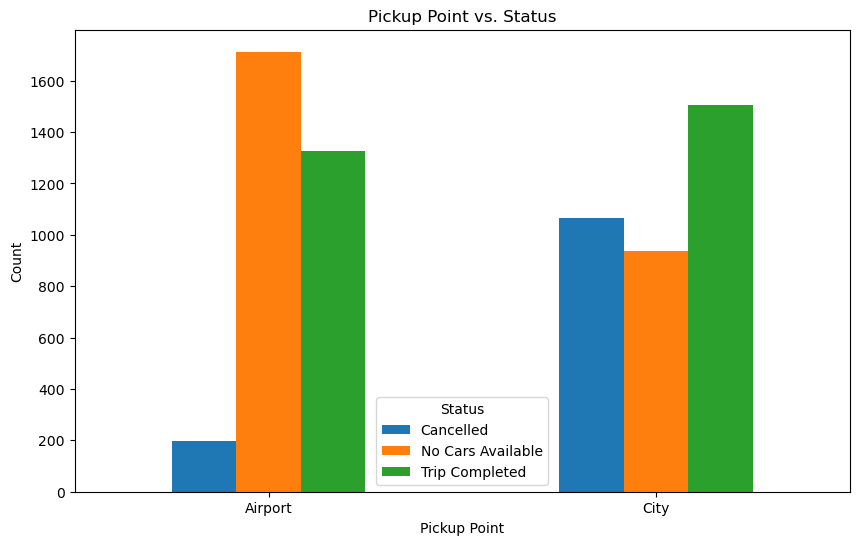

In [19]:
agg_data.plot(kind = 'bar', figsize = (10, 6))
plt.title('Pickup Point vs. Status')
plt.xlabel('Pickup Point')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Status')
plt.show()

# Weak day analysis

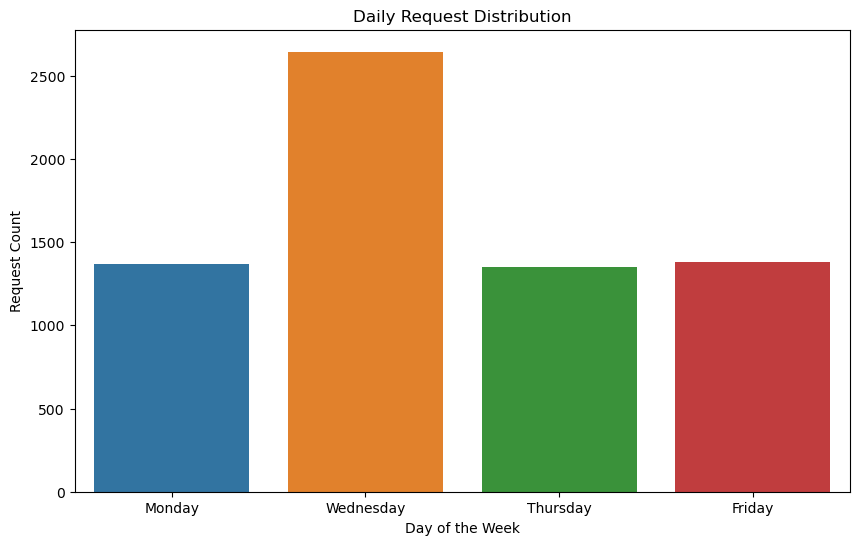

In [20]:
df['Request Day'] = df['Request timestamp'].dt.day_name()
plt.figure(figsize = (10, 6))
sns.countplot(x ='Request Day', data = df)
plt.title('Daily Request Distribution')
plt.xlabel('Day of the Week')
plt.ylabel('Request Count')
plt.show()

# Day hours analysis

In [21]:
df['Request Hour'] = df['Request timestamp'].dt.hour
hours_count = df["Request Hour"].value_counts().sort_index()
city_data=df[df["Pickup point"]=='City']
city_count= city_data["Request Hour"].value_counts().sort_index()
Airport_data=df[df["Pickup point"]=='Airport']
Airport_count= Airport_data["Request Hour"].value_counts().sort_index()

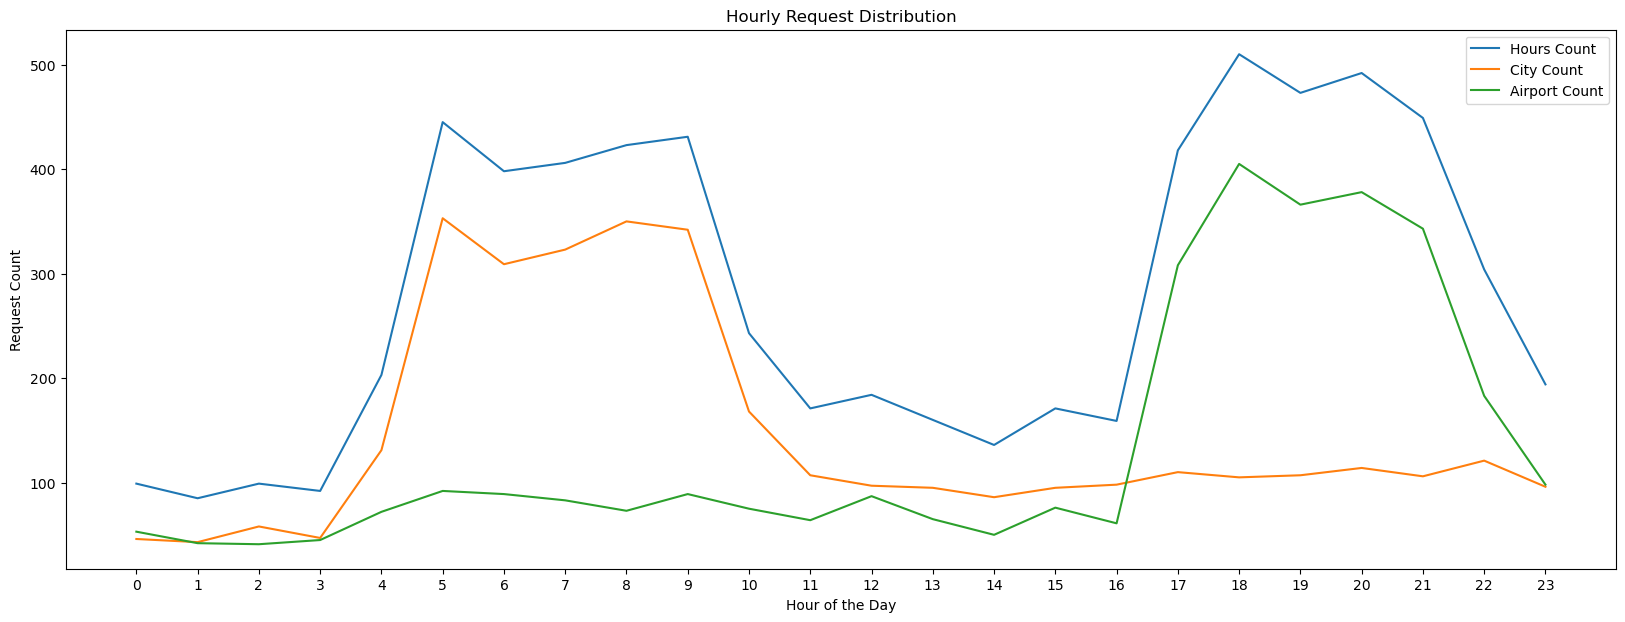

In [22]:
plt.figure(figsize=(20, 7))

sns.lineplot(x=hours_count.index, y=hours_count.values, label='Hours Count')
sns.lineplot(x=city_count.index, y=city_count.values, label='City Count')
sns.lineplot(x=Airport_count.index, y=Airport_count.values, label='Airport Count')
plt.title('Hourly Request Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Request Count')
plt.xticks(range(0,24));

# Request hours for each pickup point

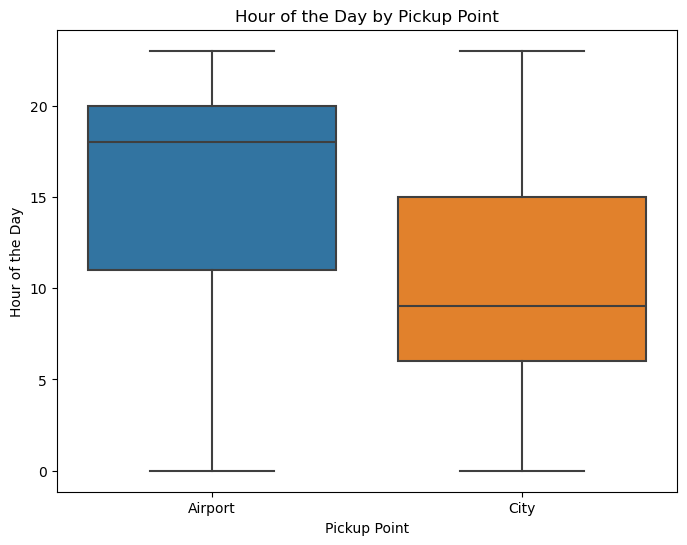

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pickup point', y= df['Request timestamp'].dt.hour, data = df)
plt.title('Hour of the Day by Pickup Point')
plt.xlabel('Pickup Point')
plt.ylabel('Hour of the Day')
plt.show()

# Number of completed trips for most 20 driver

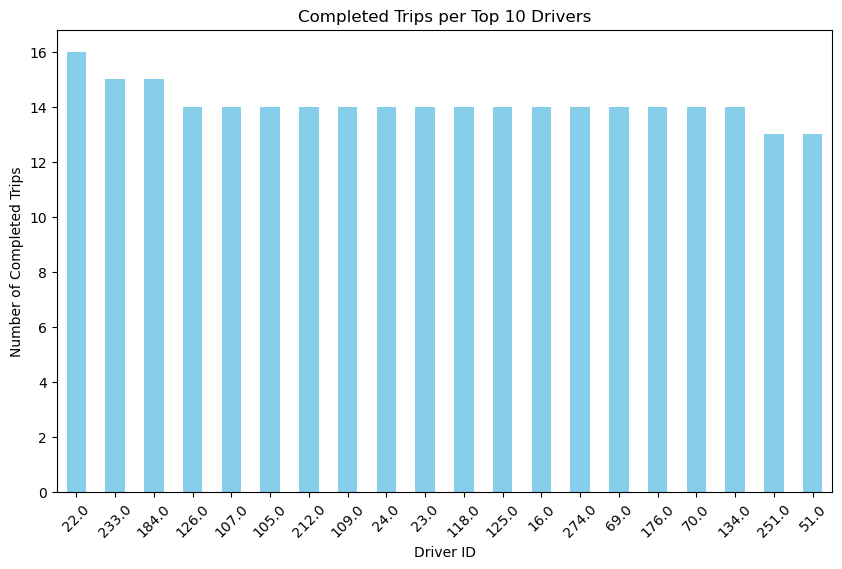

In [24]:
completed_trips = df[df['Status'] == 'Trip Completed']
driver_counts = completed_trips['Driver id'].value_counts()
top_10_drivers = driver_counts.head(20)
plt.figure(figsize  = (10, 6))
top_10_drivers.plot(kind = 'bar',  color = 'skyblue')
plt.title('Completed Trips per Top 10 Drivers')
plt.xlabel('Driver ID')
plt.ylabel('Number of Completed Trips')
plt.xticks(rotation=45)
plt.show()